Chapter 28
# 可视化3 * 3方阵奇异值分解
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

In [2]:

###patch start###
from mpl_toolkits.mplot3d.axis3d import Axis

def _get_coord_info_new(self, renderer):
    mins, maxs, cs, deltas, tc, highs = self._get_coord_info_old(renderer)
    correction = deltas * [0.25,
                           0.25,
                           0.25]
    mins += correction
    maxs -= correction
    return mins, maxs, cs, deltas, tc, highs
if not hasattr(Axis, "_get_coord_info_old"):
    Axis._get_coord_info_old = Axis._get_coord_info  
Axis._get_coord_info = _get_coord_info_new
###patch end###

## 创建数据

In [3]:
num = 21

array_1_0 = np.linspace(0,1,num)
array_0_0 = np.ones_like(array_1_0)
array_1_1 = np.zeros_like(array_1_0)

A1 = np.column_stack([array_1_0,array_0_0,array_0_0])
A2 = np.column_stack([array_1_0,array_1_1,array_0_0])
A3 = np.column_stack([array_1_0,array_0_0,array_1_1])
A4 = np.column_stack([array_1_0,array_1_1,array_1_1])

A = np.vstack((A1,A2,A3,A4))
B = np.roll(A, 1)
C = np.roll(A, 2)

X   = np.vstack((A,B,C))
colors = np.vstack((A,B,C))

## 三维散点

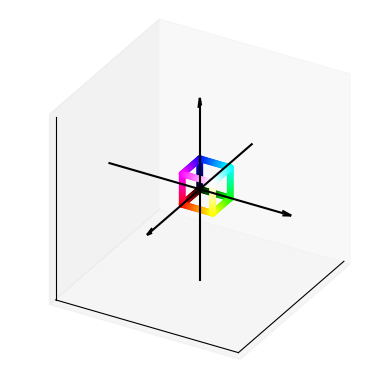

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/矮胖矩阵SVD，变换前.svg', format='svg')

## 定义矩阵A

In [5]:

# from sklearn.datasets import load_iris

# # 载入鸢尾花数据集
# iris = load_iris()
# data = iris.data[:,0:3]
# # data[:,2] = data[:,0] + data[:,1]

# # 计算相关性系数矩阵
# A = np.corrcoef(data.T)

A = np.array([[0,1,1],
              [1,0,1],
              [-1,-1,0]])

# A = np.array([[0,1,1],
#               [1,0,-1],
#               [-1,-1,0]])

In [6]:
np.linalg.det(A)
# 三维体积放大倍数
# 负数表示镜像

-2.0

In [7]:
from sympy import Matrix
A_ = Matrix(A)
U__, S__, V__ = A_.singular_value_decomposition()


In [8]:
S__

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 2]])

In [9]:
U__

Matrix([
[ sqrt(2)/2, sqrt(6)/6,  sqrt(3)/3],
[-sqrt(2)/2, sqrt(6)/6,  sqrt(3)/3],
[         0, sqrt(6)/3, -sqrt(3)/3]])

In [10]:
V__.T

Matrix([
[-sqrt(2)/2,  sqrt(2)/2,         0],
[-sqrt(6)/6, -sqrt(6)/6, sqrt(6)/3],
[ sqrt(3)/3,  sqrt(3)/3, sqrt(3)/3]])

In [11]:
U__@S__@V__.T

Matrix([
[ 0,  1, 1],
[ 1,  0, 1],
[-1, -1, 0]])

## 用矩阵A完成映射

In [12]:
Z = X@A.T

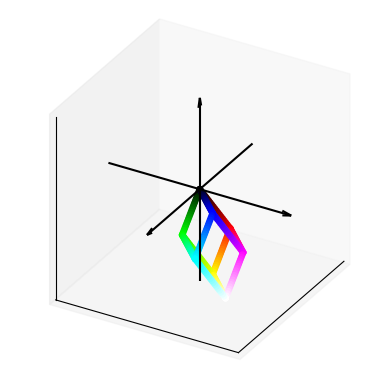

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 

ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/A转换.svg', format='svg')

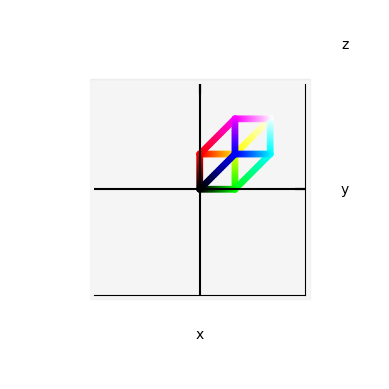

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 

ax.set_proj_type('ortho')
ax.view_init(elev=90, azim=-90) # xy
# ax.view_init(elev=0, azim=-90)  # xz
# ax.view_init(elev=0, azim=0)    # yz
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/A转换_投影.svg', format='svg')

In [15]:
A

array([[ 0,  1,  1],
       [ 1,  0,  1],
       [-1, -1,  0]])

## 奇异值分解

In [16]:
U,S,VT = np.linalg.svd(A, full_matrices=True)
V = VT.T
S = np.diag(S)
# A = U @ S @ VT
# AT = V @ ST @ UT

In [17]:
U @ S @ V.T

array([[ 2.32119315e-16,  1.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -3.70779652e-16,  1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00,  3.70779652e-16]])

## 三维旋转

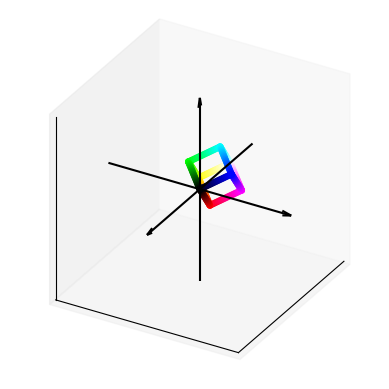

In [18]:
Z = X@V

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/V旋转.svg', format='svg')

## 缩放

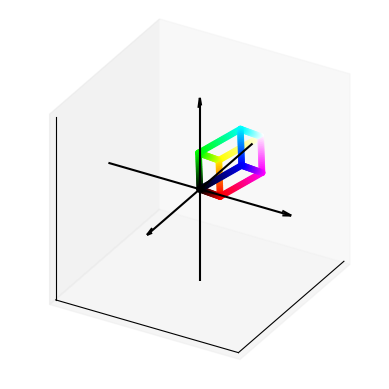

In [19]:
Z = X@V@S.T
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/V旋转，S缩放.svg', format='svg')

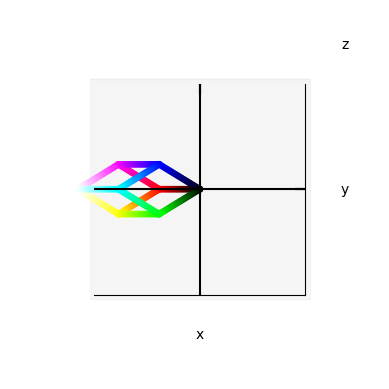

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 

ax.set_proj_type('ortho')
ax.view_init(elev=90, azim=-90) # xy
# ax.view_init(elev=0, azim=-90)  # xz
# ax.view_init(elev=0, azim=0)    # yz
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/V旋转，S缩放_投影视角.svg', format='svg')

## 再次三维旋转

In [21]:
Z = X@V@S.T@U.T

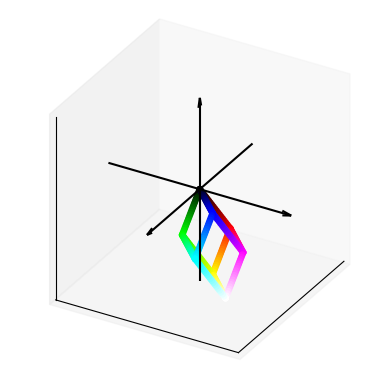

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Z[:,0], Z[:,1], Z[:,2], c = colors, s = 15, alpha = 1) 


ax.set_proj_type('ortho')
ax.view_init(azim=30, elev=30)
ax.set_box_aspect([1,1,1]) 
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
x, y, z = np.array([[-3,0,0],[0,-3,0],[0,0,-3]])
u, v, w = np.array([[6,0,0],[0,6,0],[0,0,6]])
ax.quiver(x,y,z,u,v,w,arrow_length_ratio=0.05, color="black")
fig.savefig('Figures/V旋转，S缩放，U旋转.svg', format='svg')